In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [2]:
filename = "../data/sfo_weather_2023_2024.csv"
#data source
df = pd.read_csv(filename, delimiter=',')
keep = ['DATE', 'HourlyDryBulbTemperature', 'HourlyVisibility', 'HourlyWindSpeed','HourlyWindDirection', 'HourlyPrecipitation']
df = df[keep]
df.ffill(inplace=True)
df['timestamp']=pd.to_datetime(df['DATE'], format='%Y-%m-%dT%H:%M:%S')
df.set_index(df['timestamp'], inplace=True)
df.drop(columns=['DATE'], inplace=True)
# Drop the 'STATION' column
df.drop(columns=['timestamp'], inplace=True)
# Convert object columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')
# Replace NaN values with 0.0
df.fillna(0.0, inplace=True)
df = df.iloc[2:]
#normalize each column: 
df_normalized = df.copy()  # Create a copy of the original DataFrame
columns_to_normalize = ['HourlyDryBulbTemperature', 'HourlyVisibility', 'HourlyWindSpeed', 'HourlyWindDirection', 'HourlyPrecipitation']
for column in columns_to_normalize:
    df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
df_normalized.head()

/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_23945/2212382685.py:3: DtypeWarning: Columns (21,27,28,29,30,53,72,89) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, delimiter=',')


,HourlyDryBulbTemperature,HourlyVisibility,HourlyWindSpeed,HourlyWindDirection,HourlyPrecipitation
timestamp,,,,,
2023-06-20 02:56:00,0.274510,1.000,0.348837,0.777778,0.0
2023-06-20 03:56:00,0.254902,1.000,0.302326,0.777778,0.0
2023-06-20 04:00:00,0.254902,0.994,0.302326,0.777778,0.0
2023-06-20 04:54:00,0.274510,1.000,0.232558,0.750000,0.0
2023-06-20 04:56:00,0.254902,1.000,0.255814,0.750000,0.0


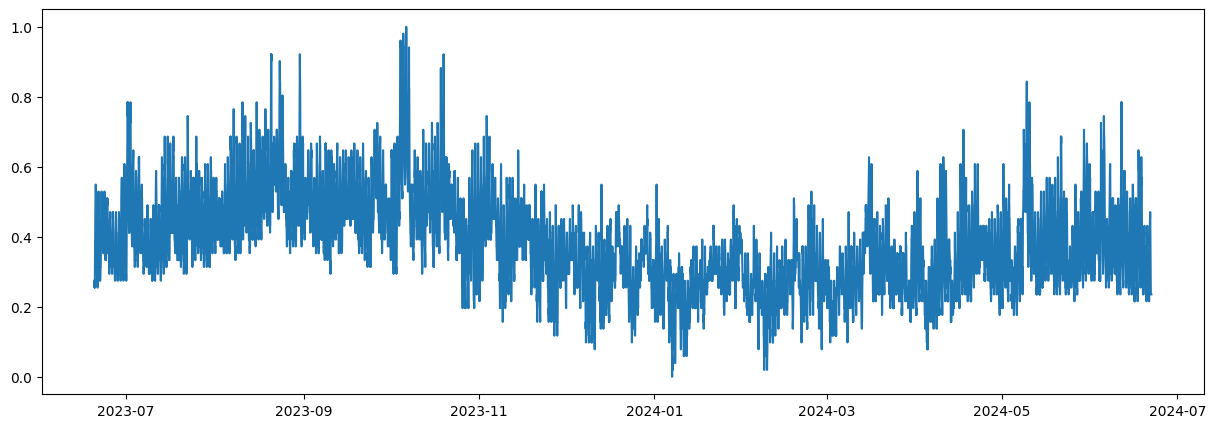

In [3]:
plt.figure(figsize =(15,5))
plt.plot(df_normalized.index, df_normalized["HourlyDryBulbTemperature"])
plt.show()

In [4]:
df_normalized.shape

(12709, 5)

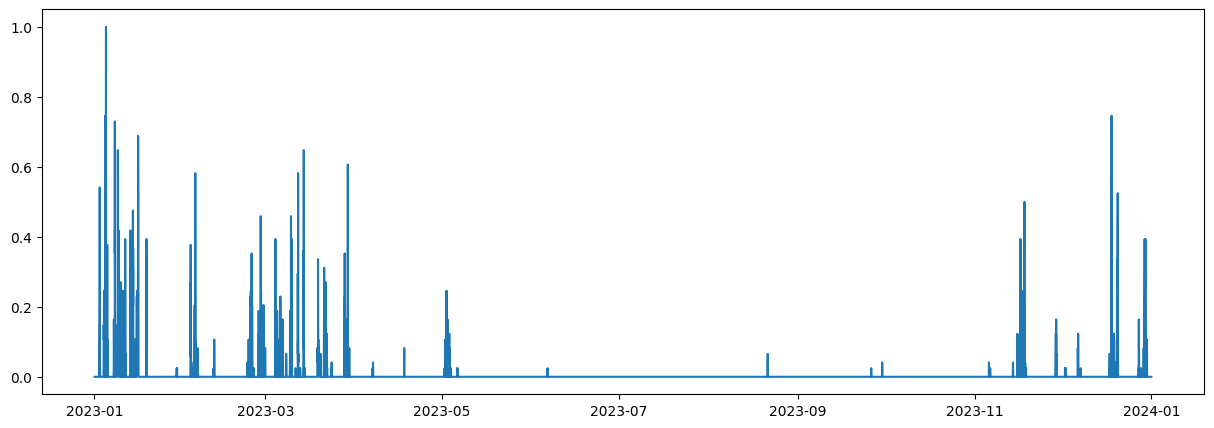

In [8]:
plt.figure(figsize =(15,5))
plt.plot(df_interpolated.index, df_interpolated["HourlyPrecipitation"])
plt.show()

In [9]:
df_interpolated.to_csv('../data/precipitation.csv')